# In diesem Notebook habe ich Probiert, ein Modell mit 2 Emotionen (happy, neutral) zu trainieren
# das Endprodukt würde auf einer ähnlichen Basis aufgebaut

In [1]:

from keras import models , layers , utils
import tensorflow as tf
import matplotlib.pyplot as plt


train_dir = "src/train2Emos"
val_dir = "src/val2emos"

BATCH_SZIZE = 32

IMG_SIZE = (160, 160)

train_images = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SZIZE,
                                                            image_size=IMG_SIZE
                                                            )


test_images = tf.keras.utils.image_dataset_from_directory(val_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SZIZE,
                                                                 image_size=IMG_SIZE
                                                                 )



# Normalize pixel values to be between 0 and 1
#train_images, test_images = train_images / 255.0, test_images / 255.0



classes = ["0","1"]
class_names = ["happy","neutral"]

# plt.figure(figsize=(10,10))
# for i in range(32):
#     plt.subplot(5,5,i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(train_images[0][i])
#     # The CIFAR labels happen to be arrays,
#     # which is why you need the extra index
#     plt.xlabel(class_names[classes[i][0]])
# plt.show()


model = models.Sequential()
model.add(layers.InputLayer(input_shape=(160,160,3)))
model.add(layers.Rescaling(scale=1./255.))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
#model.add(layers.Dense(32, activation='relu'))
#model.add(layers.Dropout(0.2))
model.add(layers.Dense(1 , activation="sigmoid"))


model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.00001),
              loss=tf.keras.losses.BinaryCrossentropy(),#from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, epochs=30,)
                    #validation_data=test_images)




Found 2064 files belonging to 2 classes.
Metal device set to: Apple M1
Found 1063 files belonging to 2 classes.
Epoch 1/30


2022-05-10 16:14:04.804955: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-10 16:14:04.805102: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-05-10 16:14:05.252660: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-10 16:14:05.252730: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


65/65 [==============================] - 12s 169ms/step - loss: 0.6928 - accuracy: 0.5087
Epoch 2/30
65/65 [==============================] - 11s 162ms/step - loss: 0.6918 - accuracy: 0.5310
Epoch 3/30
65/65 [==============================] - 11s 161ms/step - loss: 0.6900 - accuracy: 0.5606
Epoch 4/30
65/65 [==============================] - 11s 168ms/step - loss: 0.6892 - accuracy: 0.5484
Epoch 5/30
65/65 [==============================] - 11s 162ms/step - loss: 0.6861 - accuracy: 0.5717
Epoch 6/30
65/65 [==============================] - 11s 162ms/step - loss: 0.6814 - accuracy: 0.5988
Epoch 7/30
65/65 [==============================] - 11s 161ms/step - loss: 0.6764 - accuracy: 0.5964
Epoch 8/30
65/65 [==============================] - 11s 161ms/step - loss: 0.6753 - accuracy: 0.5775
Epoch 9/30
65/65 [==============================] - 11s 162ms/step - loss: 0.6665 - accuracy: 0.6420
Epoch 10/30
65/65 [==============================] - 11s 164ms/step - loss: 0.6553 - accuracy: 0.6589


34/34 [==============================] - 2s 56ms/step - loss: 0.5315 - accuracy: 0.7507


[0.5314949154853821, 0.7507055401802063]

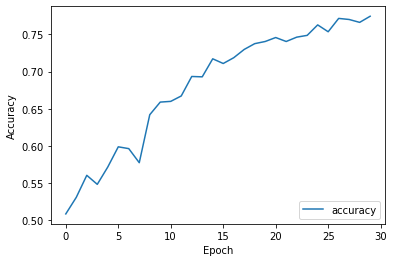

In [5]:

plt.plot(history.history['accuracy'], label='accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

model.evaluate(test_images)

KeyError: 'val_accuracy'

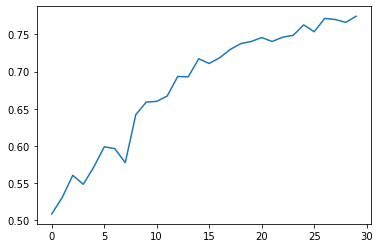

In [2]:

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, verbose=2)

23/23 - 1s - loss: 0.5957 - accuracy: 0.7021 - 988ms/epoch - 43ms/step


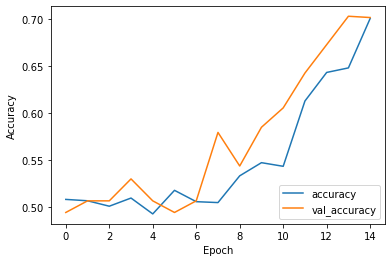

In [3]:

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, verbose=2)

In [3]:
test_images2 = tf.keras.utils.image_dataset_from_directory("src/test2emos",
                                                          shuffle=True,
                                                          batch_size=BATCH_SZIZE,
                                                          image_size=IMG_SIZE
                                                          )
model.evaluate(test_images2)

Found 9910 files belonging to 2 classes.
310/310 [==============================] - 16s 49ms/step - loss: 0.6019 - accuracy: 0.7347


[0.6019493341445923, 0.7347124218940735]

In [4]:

test_images2 = tf.keras.utils.image_dataset_from_directory("/Users/anasarodake/anas_fotos/test",
                                                           shuffle=True,
                                                           batch_size=BATCH_SZIZE,
                                                           image_size=IMG_SIZE
                                                           )
model.evaluate(test_images2)

Found 550 files belonging to 2 classes.
18/18 [==============================] - 1s 60ms/step - loss: 0.7797 - accuracy: 0.6618


[0.7797353863716125, 0.6618182063102722]